#References

*   Course: Machine Learning. Victor Adolfo Romero
*   Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition. Andreas Müller, Sarah Guido
*  https://machinelearningmastery.com/standard-machine-learning-datasets/
*  https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
*  https://archive.ics.uci.edu/ml/datasets/Wine+Quality
*  https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/
*  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
*  https://doi.org/10.1016/0002-9149(89)90524-9

* https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
*  https://www.geeksforgeeks.org/difference-between-shallow-copy-vs-deep-copy-in-pandas-dataframes/#:~:text=A%20deep%20copy%20of%20a,objects%20found%20in%20the%20original.

* https://datagy.io/sklearn-one-hot-encode/


In [ ]:
!pip install joblib==1.1.0
!pip install mglearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.0 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=9b1e42003f4ae87a6cabc791b5ca7b4c5b395048f410db17d6c2455dfca498a1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

%matplotlib inline

#The Dataset

We will use the Heart Disease Data Set, from the UCI Machine Learning Repository.
It's available at:
https://archive.ics.uci.edu/ml/datasets/heart+Disease


In [ ]:
url_info = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names"
df_info = requests.get(url_info).text

#Exploratory Data Analysis (EDA)

Let's read the information available for the data

In [ ]:
print(df_info)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

According to this, we expect four datasets:
*  Cleveland
*  Hungary
*  Switzerland
*  Long Beach

With 14 columns, which should be:

1 - age : age in years

2 - sex : sex (1 = male; 0 = female)

3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5 - chol : chol: serum cholestoral in mg/dl

6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8 - thalach : thalach: maximum heart rate achieved

9 - exang : exang: exercise induced angina (1 = yes; 0 = no)

10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest

11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

12 - ca : ca: number of major vessels (0-3) colored by flourosopy

13 - thal :  thallium scintigraphic defect 3 = normal; 6 = fixed defect; 7 = reversable defect  (to understand this one, go to the original paper at https://doi.org/10.1016/0002-9149(89)90524-9)

14 - num : The "goal" field refers to the presence of heart disease
     in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply
     attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

The 14th column is the predicted attribute

In [ ]:
df_names=["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_ecg", "maximum_heart_rate", "exercise_induced_angina", "ST_depression_exercise", "slope_exercise_ST", "major_vessels_colored", "thallium_scintigraphic_defect", "angiographic_disease_status"
]
url_data1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
url_data2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
url_data3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
url_data4 ="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

df1 = pd.read_csv(url_data1, delimiter=",", names=df_names)
df2 = pd.read_csv(url_data2, delimiter=",", names=df_names)
df3 = pd.read_csv(url_data3, delimiter=",", names=df_names)
df4 = pd.read_csv(url_data4, delimiter=",", names=df_names)


In [ ]:
display(df1)
display(df2)
display(df3)
display(df4)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,angiographic_disease_status
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


It might be advisable to use another column to indicate where the dataset comes from (Cleveland, Hungary, Switzerland)



In [ ]:
df1['location']=0 #Cleveland
df2['location']=1 #Hungary
df3['location']=2 #Switzerland
df4['location']=3 #LongBeach

Let's see the data

In [ ]:
df =  pd.concat([df1, df2, df3, df4], ignore_index= True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
new_cols = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_ecg", "maximum_heart_rate", "exercise_induced_angina", "ST_depression_exercise", "slope_exercise_ST", "major_vessels_colored", "thallium_scintigraphic_defect", "location","angiographic_disease_status"]
df_names=new_cols
df=df[new_cols]
display(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,0,1


Let's summarize the data statistics

In [ ]:
feature_description="""
1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca: number of major vessels (0-3) colored by flourosopy
13 - thal :  thallium scintigraphic defect 3 = normal; 6 = fixed defect; 7 = reversable defect  (to understand this one, go to the original paper at https://doi.org/10.1016/0002-9149(89)90524-9)
14 - location: where was recorded the data
15 - num : The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
"""

print(feature_description)


1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

In [ ]:
df.describe()


,age,sex,chest_pain_type,location,angiographic_disease_status
count,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,1.239130,0.995652
std,9.424685,0.408148,0.930969,1.129962,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,3.000000,4.000000


Apparently... statistics could not be computed for all columns...

df.info() returns us information about the data type, non-null values and memory usage.

In [ ]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholesterol                      0
fasting_blood_sugar              0
resting_ecg                      0
maximum_heart_rate               0
exercise_induced_angina          0
ST_depression_exercise           0
slope_exercise_ST                0
major_vessels_colored            0
thallium_scintigraphic_defect    0
location                         0
angiographic_disease_status      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            920 non-null    float64
 1   sex                            920 non-null    float64
 2   chest_pain_type                920 non-null    float64
 3   resting_blood_pressure         920 non-null    object 
 4   cholesterol                    920 non-null    object 
 5   fasting_blood_sugar            920 non-null    object 
 6   resting_ecg                    920 non-null    object 
 7   maximum_heart_rate             920 non-null    object 
 8   exercise_induced_angina        920 non-null    object 
 9   ST_depression_exercise         920 non-null    object 
 10  slope_exercise_ST              920 non-null    object 
 11  major_vessels_colored          920 non-null    object 
 12  thallium_scintigraphic_defect  920 non-null    obj

There is something important: despite saying there is no null values, many attributes are labeled as type "object" this means they don't have numeric values (and they should). If you check the dataframe, you can see many "?" symbols denoting missing data.

Let's check each column to look for strange symbols...

In [ ]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

age : [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73. 75.]
sex : [1. 0.]
chest_pain_type : [1. 4. 3. 2.]
resting_blood_pressure : [145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '130' '120' '140' '170' '100' '105' '110' '125' '150' '98'
 '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108' '124'
 '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '95' '165'
 '80' '185' '126' '152' '116' '0' '144' '154' '104' '134' '178' '146'
 '158' '102' '96' '172' '156' '114' '127']
cholesterol : [233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 1

In many columns we find "?" marking missing data. Let's replace those with nan

In [ ]:
for col in df.columns:
    df[col].replace({'?':np.nan},inplace=True)
df.isnull().sum()

age                              0  
sex                              0  
chest_pain_type                  0  
resting_blood_pressure           59 
cholesterol                      30 
fasting_blood_sugar              90 
resting_ecg                      2  
maximum_heart_rate               55 
exercise_induced_angina          55 
ST_depression_exercise           62 
slope_exercise_ST                309
major_vessels_colored            611
thallium_scintigraphic_defect    486
location                         0  
angiographic_disease_status      0  
dtype: int64

Now we do find null values. A lot, actually. Let's visualize where they are:

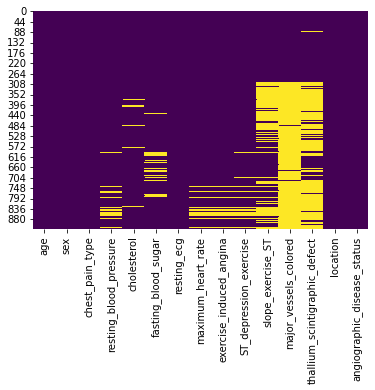

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

Most of the missing data are in rows from 300 on. That means that they correspond mostly to the hungarian, swiss and long beach datasets. 

In [ ]:
display(df)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,0,1


Looks better now BUT!!!!! there was something strange going on with numbers that had quotation marks... 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            920 non-null    float64
 1   sex                            920 non-null    float64
 2   chest_pain_type                920 non-null    float64
 3   resting_blood_pressure         861 non-null    object 
 4   cholesterol                    890 non-null    object 
 5   fasting_blood_sugar            830 non-null    object 
 6   resting_ecg                    918 non-null    object 
 7   maximum_heart_rate             865 non-null    object 
 8   exercise_induced_angina        865 non-null    object 
 9   ST_depression_exercise         858 non-null    object 
 10  slope_exercise_ST              611 non-null    object 
 11  major_vessels_colored          309 non-null    object 
 12  thallium_scintigraphic_defect  434 non-null    obj

Still, many columns appear as dtype "object" all of them should be float, except location

In [ ]:
for col in df.columns[:14]:
    df[col]=df[col].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            920 non-null    float64
 1   sex                            920 non-null    float64
 2   chest_pain_type                920 non-null    float64
 3   resting_blood_pressure         861 non-null    float64
 4   cholesterol                    890 non-null    float64
 5   fasting_blood_sugar            830 non-null    float64
 6   resting_ecg                    918 non-null    float64
 7   maximum_heart_rate             865 non-null    float64
 8   exercise_induced_angina        865 non-null    float64
 9   ST_depression_exercise         858 non-null    float64
 10  slope_exercise_ST              611 non-null    float64
 11  major_vessels_colored          309 non-null    float64
 12  thallium_scintigraphic_defect  434 non-null    flo

In [ ]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,1.239130,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.129962,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,3.000000,4.000000


There are also some strange values in "cholesterol" and "resting blood pressure". These values shouldn't be zero...
Let's find out how many zero values do we have there

In [ ]:
nm = (df[['cholesterol']] == 0).sum()
print(nm)
nm = (df[['resting_blood_pressure']] == 0).sum()
print(nm)

cholesterol    172
dtype: int64
resting_blood_pressure    1
dtype: int64


(array([  1.,   0.,   0.,   0.,  12., 149., 388., 218.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

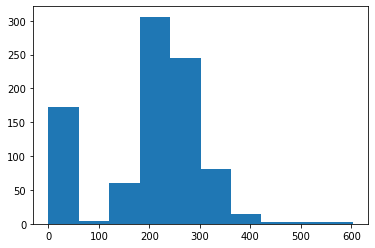

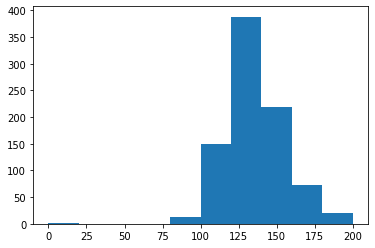

In [ ]:
plt.hist(df['cholesterol'])
plt.figure()
plt.hist(df['resting_blood_pressure'])

So many zero values in "cholesterol". This is most likely a representation of missing data, so let´s replace them with nan

In [ ]:
df['cholesterol'] = df['cholesterol'].replace(0, np.nan)
df['resting_blood_pressure'] = df['resting_blood_pressure'].replace(0, np.nan)

# count the number of nan values in each column
print(df.isnull().sum())

age                              0  
sex                              0  
chest_pain_type                  0  
resting_blood_pressure           60 
cholesterol                      202
fasting_blood_sugar              90 
resting_ecg                      2  
maximum_heart_rate               55 
exercise_induced_angina          55 
ST_depression_exercise           62 
slope_exercise_ST                309
major_vessels_colored            611
thallium_scintigraphic_defect    486
location                         0  
angiographic_disease_status      0  
dtype: int64


And now... let's just drop all the NaN values (we will see some other ways to handle them afterwards)

In [ ]:
df_full_clean=df.copy(deep=True)
print(df_full_clean.shape)

(920, 15)


In [ ]:
# drop rows with missing values
df.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(df.shape)

(299, 15)


In [ ]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.013378,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,0.182695,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,0.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,3.000000,4.000000


Let's check if there are any duplicates

In [ ]:
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status


Apparently there are no duplicated samples

Let's see the feature distributions

In [ ]:
print(feature_description)


1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

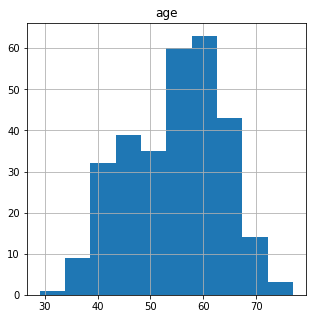

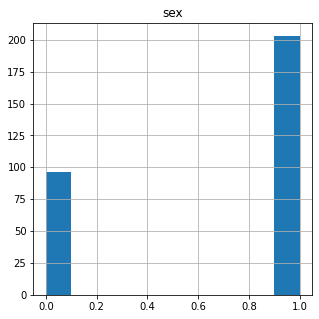

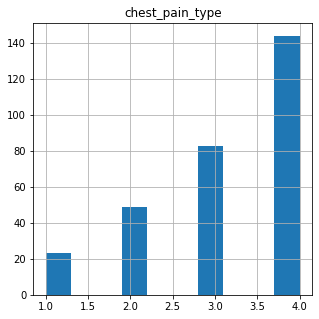

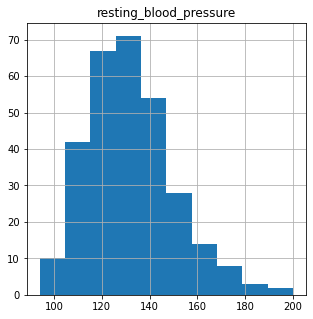

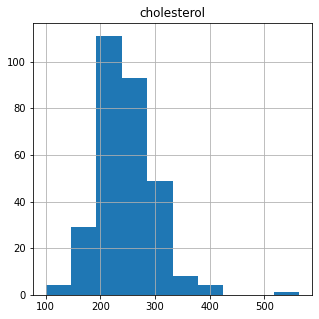

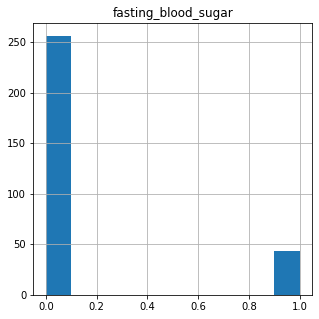

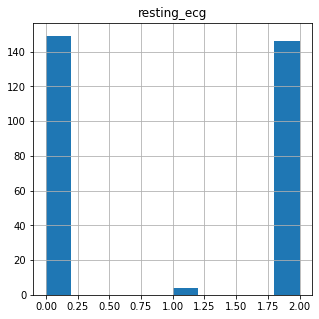

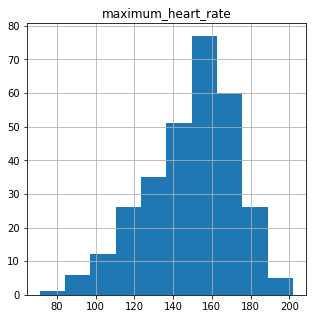

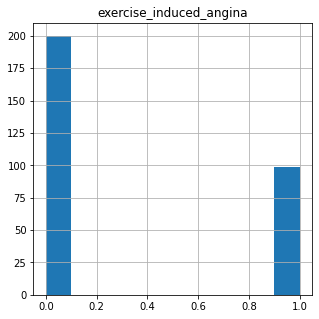

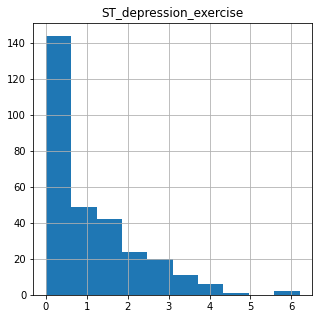

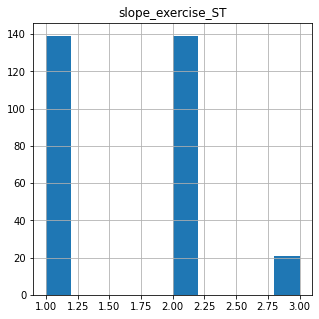

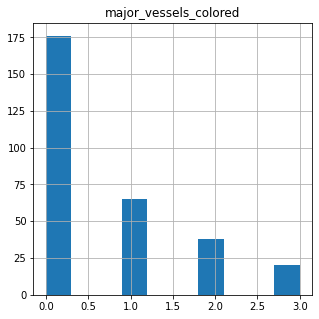

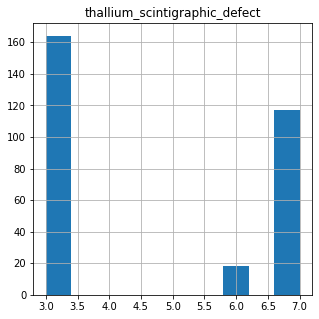

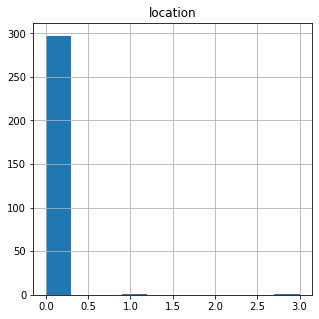

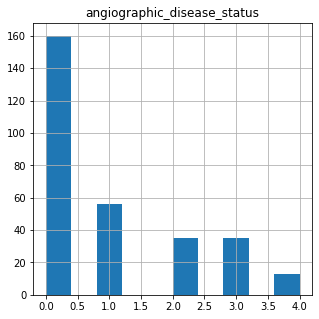

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
for x in df_names:
  plt.figure()
  plt.title(x)
  df[x].hist()

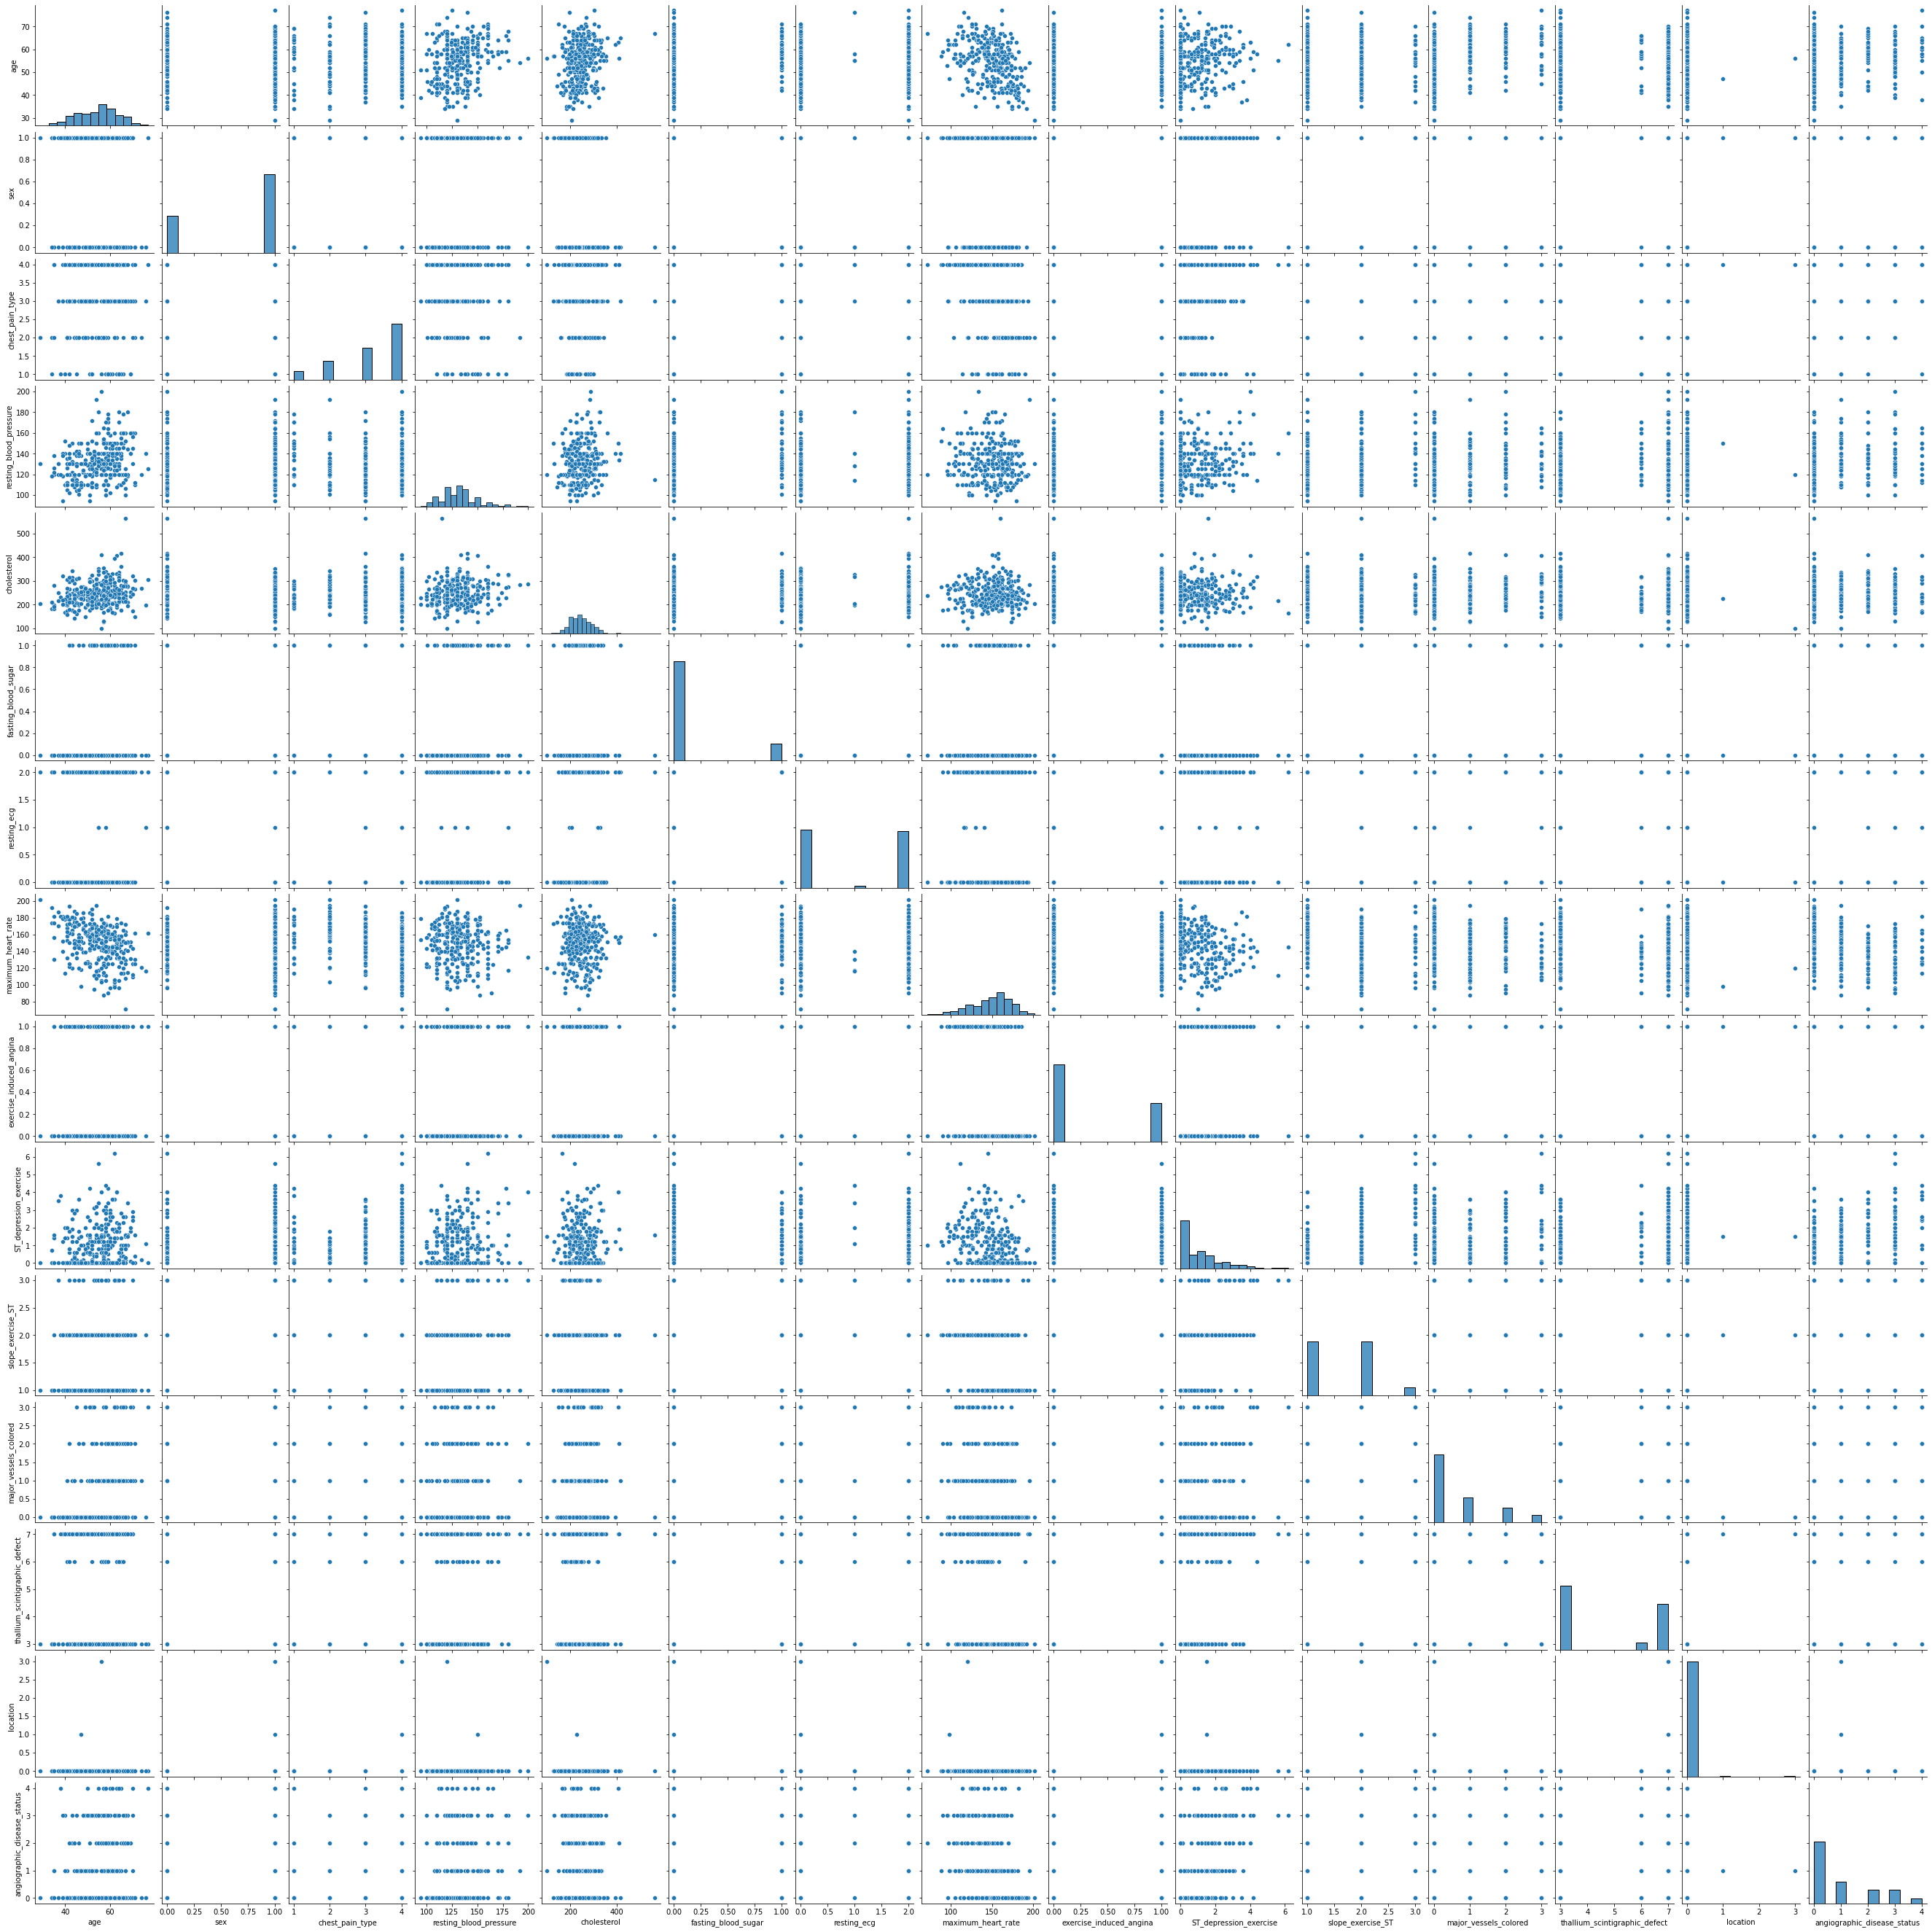

In [ ]:
sns.pairplot(df)

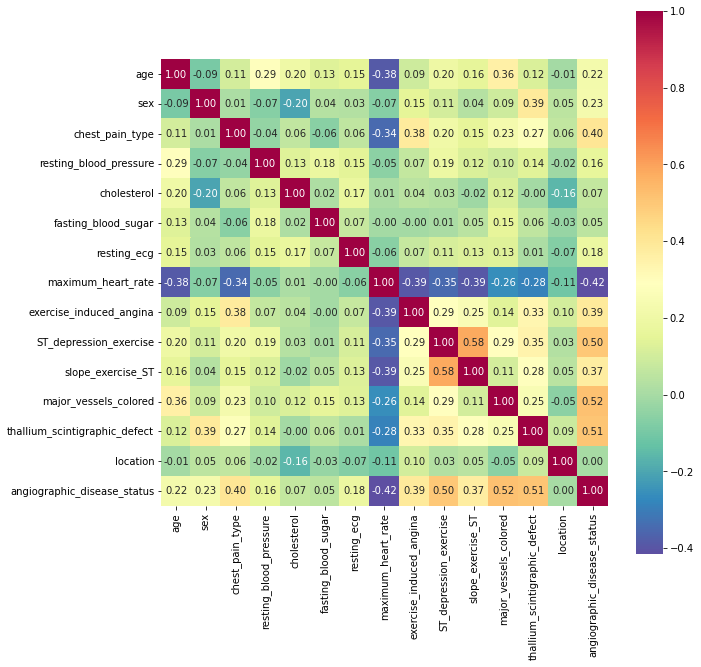

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()


In [ ]:
df['angiographic_disease_status'].value_counts()

0    160
1    56 
2    35 
3    35 
4    13 
Name: angiographic_disease_status, dtype: int64

This count of different values in the target column (angiographic disease status) let us see that there is imbalance between the different classes. We will address this  later.

# **Very important break and explain**
There is something important to take into account from now on: memory management in Python can be confusing, and assigning variables is not the same as copying them. We will now make some operations with parts of the dataset, and if we are not careful we will get unexpected results Let´s look at an example:

In [ ]:
import copy as cp
a=np.array([0, 1, 2, 3])
b=a
c=cp.copy(a)

b[0]=666
c[0]=888
#b[b>0]=1

print("a: ", a)
print("b: ", b)
print("c: ", c)


a:  [666   1   2   3]
b:  [666   1   2   3]
c:  [888   1   2   3]


as you can see, we told Python to modify **b** but we also ended up modifying **a**. 

Now let's look at another example:


In [ ]:
a=np.array([0, 1, 2, [3, 4, 5, 6, 7]], dtype='object')
b=a
c=cp.copy(a)
d=cp.deepcopy(a)

b[2]=111
c[2]=222
d[2]=333

print("a: ", a)
print("b: ", b)
print("c: ", c)
print("d: ", d)



a:  [0 1 111 list([3, 4, 5, 6, 7])]
b:  [0 1 111 list([3, 4, 5, 6, 7])]
c:  [0 1 222 list([3, 4, 5, 6, 7])]
d:  [0 1 333 list([3, 4, 5, 6, 7])]


In [ ]:
b[3][2]=444
c[3][2]=555
d[3][2]=666

print("a: ", a)
print("b: ", b)
print("c: ", c)
print("d: ", d)

a:  [0 1 111 list([3, 4, 555, 6, 7])]
b:  [0 1 111 list([3, 4, 555, 6, 7])]
c:  [0 1 222 list([3, 4, 555, 6, 7])]
d:  [0 1 333 list([3, 4, 666, 6, 7])]


So, if you use the assignment operator, you **WON'T** create a new object, you will just create another label pointing to the same direction (in this case, that means that any modification in array b will also affect array a.

If you use copy(), then you **WILL** create a new object, and modifications you make to array c will NOT affect array a. However... if array a has other arrays nested inside of it, then changing those elements in array c **will** change them in array a and b. That's why this type of copy is called "shallow" copy.

If you use deepcopy(), then you **WILL** create a new object, and will create new objects also for any other arrays nested within. Therefore modifications you make to array d will NOT affect array a, b or c. That's why this type of copy is called "deep" copy.


In [ ]:
print(df['angiographic_disease_status'].values)

[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1 1 1]


In [ ]:
X = df.drop(['angiographic_disease_status'],axis=1).values
print(X)
df.head(5)


[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  0.]
 [67.  1.  4. ...  2.  7.  0.]
 ...
 [57.  0.  2. ...  1.  3.  0.]
 [47.  1.  4. ...  0.  7.  1.]
 [56.  1.  4. ...  0.  7.  3.]]


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0


In [ ]:
X[X>0]=1
print(X)
df.head(5)


[[1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 ...
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0


In [ ]:
Y_mc=df['angiographic_disease_status'].values
print(Y_mc)
df['angiographic_disease_status'].head()

[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1 1 1]


0    0
1    2
2    1
3    0
4    0
Name: angiographic_disease_status, dtype: int64

In [ ]:
Y_mc[Y_mc>0]=1
print(Y_mc)
df['angiographic_disease_status'].head()

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1]


0    0
1    1
2    1
3    0
4    0
Name: angiographic_disease_status, dtype: int64

you can see from the previous code that we don't have a problem when creating X, because it doesn't point to a specific column of the dataframe, but to an operation over the whole dataframe. However, we do run into problems with Y, because it points to a column of the dataframe df. So Y is linked to this column, and changes over it affect that part of the dataframe as well. 

Keep that in mind when doing this kind of operations

## End of the break

In [ ]:
df=df_full_clean.copy(deep=True)
df.dropna(inplace=True)
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,0.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,0.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,0.0,1


In [ ]:
X = cp.deepcopy(df.drop(['angiographic_disease_status'],axis=1).values)
Y_mc=cp.deepcopy(df['angiographic_disease_status'].values)
Y_bin=cp.deepcopy(df['angiographic_disease_status'].values)
Y_bin[Y_bin>0]=1
print(X)
print(Y_mc)
print(Y_bin)
df.head()

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  0.]
 [67.  1.  4. ...  2.  7.  0.]
 ...
 [57.  0.  2. ...  1.  3.  0.]
 [47.  1.  4. ...  0.  7.  1.]
 [56.  1.  4. ...  0.  7.  3.]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1 1 1]
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,ST_depression_exercise,slope_exercise_ST,major_vessels_colored,thallium_scintigraphic_defect,location,angiographic_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train_mc)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.629
Test set score: 0.573
List of Coefficients:  [[ 8.48569923e-03 -9.38079807e-02 -1.82757300e-01 -4.97187649e-03
  -2.20238218e-03  1.12564738e-02 -9.16460249e-02  3.92380152e-02
  -9.07092364e-02 -2.34477412e-01 -9.43172650e-02 -1.92567723e-01
  -4.86955838e-01 -7.65994392e-03]
 [-3.31486170e-02  2.97290875e-02  2.96607281e-02  1.19168671e-02
  -7.23024801e-04 -2.93977269e-02  2.82433893e-02  5.17226823e-03
   4.17326392e-02 -2.29981039e-02 -8.53501151e-03 -2.64775940e-02
   5.84236307e-02  1.47763249e-02]
 [-9.71317067e-04  3.38637460e-02  6.40730897e-02  4.57498922e-03
   6.71258453e-03  6.26767235e-03 -3.93544801e-03 -2.49395702e-02
   1.56078781e-02  8.22923429e-02  4.59210105e-02  5.63709727e-02
   1.30086445e-01 -1.54119579e-03]
 [-6.41951612e-02  2.40336723e-02  8.18959395e-02  2.70304995e-02
   4.04528056e-04  1.63326773e-02  3.43384395e-02 -1.47262086e-02
   3.78348954e-02  9.29584893e-02  3.31751707e-02  8.91706653e-02
   2.45255720e-01 -3.72537741e-0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##¿Should we simplify our problem?

Performance is not good if we target the multiclass problem... let's try to make it just a binary classification, and see what happens:

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train_bin)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_bin)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.871
Test set score: 0.853
List of Coefficients:  [[-0.04071632  0.59178052  0.40717807  0.02076712  0.00148098 -0.35572671
   0.33371234 -0.03948926  0.69767713  0.53299014  0.18657668  0.92340628
   0.31299859  0.09344058]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


From 0.57 to 0.85, That's a big difference!

#Missing data

Let´s go back to the missing data... ¿would it be better if we tried another approach?.
We will try the following approaches:
*  Impute using the mean
*  Impute using the median
*  Impute using the mode

However, let´s have in mind two things:

1- Some features are categorical. Therefore they can't have values different from those specified.

2- We will have to divide our dataset in training and test before doing the imputation. If we computed mean, median or any other statistic from the full dataset we would be using information from our test set (which is NOT correct)



In [ ]:
df=df_full_clean.copy(deep=True)
X = cp.deepcopy(df.drop(['angiographic_disease_status'],axis=1).values)
Y_mc=cp.deepcopy(df['angiographic_disease_status'].values)
Y_bin=cp.deepcopy(df['angiographic_disease_status'].values)
Y_bin[Y_bin>0]=1
print(X)
print(Y_mc)
print(Y_bin)
df.head()
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  0.]
 [67.  1.  4. ...  2.  7.  0.]
 ...
 [55.  1.  4. ... nan  6.  3.]
 [58.  1.  4. ... nan nan  3.]
 [62.  1.  2. ... nan nan  3.]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1
 1 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0
 0 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1
 0 0 2 1 2 0 3 1 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0
 0 3 1 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0
 1 0 3 0 0 4 2 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 0 1 0 2 2 1 0
 3 1 1 2 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Now... What variables (columns) can we replace with the mean or the median?. First, let's check what feature have nans:

In [ ]:
print(feature_description)


1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

In [ ]:
print(np.sum(np.isnan(X_train),axis=0))
print(np.sum(np.isnan(X_test),axis=0))
print(np.sum(np.isnan(y_train_mc),axis=0))
print(np.sum(np.isnan(y_test_mc),axis=0))
print(np.sum(np.isnan(y_train_bin),axis=0))
print(np.sum(np.isnan(y_test_bin),axis=0))

[  0   0   0  46 155  70   2  42  42  48 230 457 363   0]
[  0   0   0  14  47  20   0  13  13  14  79 154 123   0]
0
0
0
0


Remember numpy arrays are zero-indexed.

We have nans in the following columns of the training set:

* resting blood pressure: it's continous, we can replace using median or mean
* cholesterol: it's continous, we can replace using median or mean
* fasting blood sugar: this is categorical, we can use the mode
* restecg: this is categorical, we can use the mode
* maximum heart rate: it's continous, we can replace using median or mean
* exercise induced angina: this is categorical, we can use the mode
* ST depression: it's continous, we can replace using median or mean
* ST slope: this is categorical, we can use the mode
* colored vessels: this is categorical, we can use the mode
* thallium defect: this is categorical, we can use the mode

Also, there is another important aspect: all these values are computed in the training set but should be replaced in the test set as well. However, it might happen that there one column that has nans in the test set but not in the training set (or the other way around). The replace value should still be computed in the training set:


In [ ]:
import statistics as st

replace_values=[None,
                None,
                None,
                np.nanmedian(X_train[:,3]),#resting blood pressure: it's continous
                np.nanmedian(X_train[:,4]),#cholesterol: it's continous
                st.mode(X_train[:,5]),#fasting blood sugar: this is categorical,
                st.mode(X_train[:,6]),#restecg: this is categorical,
                np.nanmedian(X_train[:,7]),# maximum heart rate: it's continous,
                st.mode(X_train[:,8]),# exercise induced angina, this is categorical, 
                np.nanmedian(X_train[:,9]),# ST depression: it's continous,
                st.mode(X_train[:,10]),# ST slope: this is categorical,
                st.mode(X_train[:,11]),# colored vessels: this is categorical
                st.mode(X_train[:,12]),# thallium defect: this is categorical,
                None
                ]

print(replace_values)


for i in range(X.shape[1]):
  X_train[np.isnan(X_train[:,i]),i]=replace_values[i]
  X_test[np.isnan(X_test[:,i]),i]=replace_values[i]

print(X_train)
print(X_test)

print(np.sum(np.isnan(X_train),axis=0))
print(np.sum(np.isnan(X_test),axis=0))

  

[None, None, None, 130.0, 240.0, 0.0, 0.0, 140.0, 0.0, 0.5, 2.0, 0.0, 3.0, None]
[[57.  0.  1. ...  0.  3.  1.]
 [59.  0.  2. ...  0.  3.  1.]
 [63.  0.  4. ...  2.  3.  0.]
 ...
 [49.  1.  4. ...  0.  3.  1.]
 [49.  0.  3. ...  0.  3.  1.]
 [54.  1.  2. ...  0.  3.  1.]]
[[60.  1.  3. ...  0.  3.  3.]
 [40.  1.  2. ...  0.  3.  1.]
 [64.  0.  4. ...  0.  7.  3.]
 ...
 [38.  1.  4. ...  0.  3.  1.]
 [54.  1.  4. ...  1.  7.  0.]
 [37.  1.  2. ...  0.  3.  1.]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Now let's try to solve the multiclass classification:

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train_mc)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.571
Test set score: 0.552
List of Coefficients:  [[-1.90169983e-02 -1.07706488e-01 -2.95161836e-01  8.75483883e-03
   4.99817415e-04 -3.53507631e-03 -3.74666733e-02  2.89126349e-02
  -1.40266959e-01 -2.88047511e-01 -4.24656213e-02 -9.52029765e-02
  -3.56788109e-01 -1.65089273e-01]
 [-4.19542507e-02  6.41352207e-02  1.71443937e-01  3.50448074e-03
   5.30884765e-03 -2.49480634e-02 -4.47995240e-02  3.19376373e-03
   8.08476110e-02  2.32516833e-02  3.04555437e-02 -4.31439721e-02
   4.82407042e-02  6.30760819e-02]
 [ 7.43977701e-04  2.57648993e-02  6.55118439e-02 -1.29618397e-04
  -1.24542109e-03  5.82518810e-03  2.11868753e-02 -3.87831061e-03
   2.07411575e-02  7.21101354e-02  3.91835847e-03  3.81894518e-02
   8.50437385e-02  8.41434351e-02]
 [ 3.18089006e-02  1.52942145e-02  4.99048979e-02 -4.73210814e-04
  -1.71673594e-03  2.29455449e-02  2.26958049e-02 -1.99535785e-02
   3.21441097e-02  1.19543643e-01 -1.84534643e-03  6.76026973e-02
   1.78048694e-01  3.04117873e-0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


This is interesting. Even though we decided to keep as much data as possible, by replacing nans with sensible imputation values, the results are not better (in fact, they are a little bit worse). In this case, it seems that imputation doesn't improve things (or at least not with the current settings).
What about the binary problem?

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train_bin)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_bin)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.829
Test set score: 0.839
List of Coefficients:  [[-0.0116164   0.77342088  0.45530299 -0.00661781  0.00226369 -0.03321291
   0.05154849 -0.02209977  0.84340205  0.64295632 -0.27808665  1.05465899
   0.28821607  0.64236885]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Nope. The binary problem doesn't improve either. Therefore, we will go back to our initial approach: drop the nans (by doing this we're avoiding the use of "artificial" data)

In [ ]:
df=df_full_clean.copy(deep=True)
df.dropna(inplace=True)
X = cp.deepcopy(df.drop(['angiographic_disease_status'],axis=1).values)
Y_mc=cp.deepcopy(df['angiographic_disease_status'].values)
Y_bin=cp.deepcopy(df['angiographic_disease_status'].values)
Y_bin[Y_bin>0]=1
print(X)
print(Y_mc)
print(Y_bin)
df.head()
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  0.]
 [67.  1.  4. ...  2.  7.  0.]
 ...
 [57.  0.  2. ...  1.  3.  0.]
 [47.  1.  4. ...  0.  7.  1.]
 [56.  1.  4. ...  0.  7.  3.]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1 1
 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0 0
 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1 0 0
 2 1 2 0 3 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0 0 3 1
 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0 1 0 3
 0 0 4 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 1 0 2 2 1 0 3 1 1 2 3
 1 1 1]
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0

#Balanced classification

First, let's re-check if the classes are balanced in the multiclass and the binary class problem

In [ ]:
print(sum(y_train_mc==0))
print(sum(y_train_mc==1))
print(sum(y_train_mc==2))
print(sum(y_train_mc==3))
print(sum(y_train_mc==4))

120
42
26
26
10


In [ ]:
print(sum(y_train_bin==0))
print(sum(y_train_bin==1))

120
104


The binary case is more or less balanced. The multiclass case is not.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from collections import Counter

Let's try first the binary case:

In [ ]:
under_sampler = RandomUnderSampler(random_state=0)
X_res, y_res = under_sampler.fit_resample(X_train, y_train_bin)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_bin)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 104, 1: 104})
Testing target statistics: Counter({0: 40, 1: 35})
Training set score: 0.851
Test set score: 0.880
List of Coefficients:  [[-0.03290162  0.72061747  0.30686611  0.01205083  0.00490904 -0.52357695
   0.24528998 -0.03722049  0.82178154  0.45091452  0.13526681  0.96722738
   0.35686739  0.15790616]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
over_sampler = RandomOverSampler(random_state=0)
X_res, y_res = over_sampler.fit_resample(X_train, y_train_bin)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_bin)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 120, 1: 120})
Testing target statistics: Counter({0: 40, 1: 35})
Training set score: 0.842
Test set score: 0.880
List of Coefficients:  [[-0.028615    0.68739418  0.31095216  0.01571085  0.00215156 -0.32721674
   0.27747518 -0.03941374  0.68660339  0.46842837  0.10027402  1.07205578
   0.38231158  0.16735533]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
smote_sampler = SMOTE(random_state=0)
X_res, y_res = smote_sampler.fit_resample(X_train, y_train_bin)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_bin)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 120, 1: 120})
Testing target statistics: Counter({0: 40, 1: 35})
Training set score: 0.858
Test set score: 0.867
List of Coefficients:  [[-0.03273041  0.66423228  0.40799747  0.0169903   0.00300927 -0.46426621
   0.37061399 -0.03977934  0.8502054   0.52437337  0.05981183  0.96416491
   0.32194449  0.22666773]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Let's try now the multiclass case:

In [ ]:
under_sampler = RandomUnderSampler(random_state=0)
X_res, y_res = under_sampler.fit_resample(X_train, y_train_mc)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_mc)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 10, 1: 10, 2: 10, 3: 10, 4: 10})
Testing target statistics: Counter({0: 40, 1: 14, 2: 9, 3: 9, 4: 3})
Training set score: 0.660
Test set score: 0.480
List of Coefficients:  [[ 2.29452574e-02 -1.57156967e-01 -5.16921172e-01 -1.73125041e-02
  -2.08996689e-03  2.26496644e-02 -7.78947912e-02  6.81272321e-02
  -1.83304808e-01 -4.26454207e-01 -3.64953512e-01 -5.11076902e-03
  -1.27667528e+00 -3.64736550e-02]
 [ 4.22625388e-02 -2.79389008e-02  1.57610286e-01 -1.75116674e-02
   4.35914463e-03 -6.15048954e-02 -1.17453554e-01  6.44467287e-03
   1.10038892e-01 -3.79674749e-01  1.49600077e-02 -3.87707340e-01
  -4.52852553e-02  1.36035437e-01]
 [ 2.69213720e-02  7.91635849e-02  6.06470666e-02 -1.75262648e-02
   6.19694127e-03  7.90844586e-02 -1.38333242e-01 -2.20117204e-02
   6.19061170e-03  1.37876033e-01  1.19228250e-01  3.74700922e-02
   4.70474785e-01 -2.84027195e-02]
 [-1.53409525e-01  1.07568994e-01  2.53514588e-01  8.27459792e-02
  -8.60971636e-03 -1.5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
over_sampler = RandomOverSampler(random_state=0)
X_res, y_res = over_sampler.fit_resample(X_train, y_train_mc)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_mc)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 120, 2: 120, 1: 120, 3: 120, 4: 120})
Testing target statistics: Counter({0: 40, 1: 14, 2: 9, 3: 9, 4: 3})
Training set score: 0.463
Test set score: 0.533
List of Coefficients:  [[-1.62469147e-02 -1.10341410e-01 -1.59334048e-01  6.00201598e-03
  -6.39273444e-03  1.02494349e-02 -1.18512571e-01  4.37935425e-02
  -1.05574340e-01 -3.61125818e-01 -1.29175537e-01 -2.10514057e-01
  -6.29407165e-01 -5.68184237e-03]
 [-4.02393340e-03  2.76235992e-02 -5.03433194e-02  8.18705952e-03
  -2.01329661e-03 -3.42961388e-02 -4.13097442e-03  1.02339654e-02
   3.56266234e-02 -1.97828845e-01 -8.73825660e-02 -1.51558994e-01
  -1.04895069e-01  2.69931139e-02]
 [ 3.61649366e-02  5.56195430e-02  1.10511031e-01 -1.58660718e-02
   1.23752834e-02  2.06996270e-02  9.35761120e-03 -2.71609080e-02
   3.25420401e-02  7.30916658e-03  5.92614810e-02 -1.79858425e-02
   8.49649732e-02 -2.05074553e-03]
 [-4.26715187e-02  3.30211528e-02  1.48708068e-01  1.88068308e-02
  -3.94471435e-03

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
smote_sampler = SMOTE(random_state=0)
X_res, y_res = smote_sampler.fit_resample(X_train, y_train_mc)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_mc)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))
print("List of Coefficients: ", logreg.coef_)

Training target statistics: Counter({0: 120, 2: 120, 1: 120, 3: 120, 4: 120})
Testing target statistics: Counter({0: 40, 1: 14, 2: 9, 3: 9, 4: 3})
Training set score: 0.485
Test set score: 0.547
List of Coefficients:  [[-6.81898882e-03 -1.46922261e-01 -2.59115794e-01  1.59058044e-03
  -3.74277438e-03  1.89294793e-02 -1.36527064e-01  5.38689609e-02
  -1.46432079e-01 -5.12764154e-01 -1.96961128e-01 -2.86035282e-01
  -9.01915374e-01 -5.04613450e-03]
 [-4.56791598e-03 -5.65857357e-04  5.05982342e-02  1.10864728e-02
  -1.50407699e-03 -4.14256675e-02  8.59886519e-03  8.29384213e-03
   9.22573959e-02 -2.38818806e-01 -8.22563902e-02 -2.30608184e-01
  -1.56158373e-01  2.74581800e-02]
 [ 2.93838296e-02  6.99113572e-02  1.28125721e-01 -1.12236647e-02
   8.82503142e-03  8.57029521e-03 -3.99879647e-02 -3.01326917e-02
   2.78935361e-02  1.02340225e-01  9.59291535e-02 -9.81876816e-03
   2.60092541e-01 -3.85782109e-03]
 [-6.01768678e-02  5.43531295e-02  2.10741119e-01  2.37764934e-02
  -5.21883774e-05

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The binary classification showed some improvement, but the multiclass classification didn't. So, maybe using undersampling would be a good strategy for the binary problem (but it would not be a good idea for the multiclass problem). For now, we will leave it like that (we could play around with some of the sampling parameters and maybe obtain something better, feel free to try new things.

#Encoding categorical data

In [ ]:
print(feature_description)
print(df_names)


1 - age : age in years
2 - sex : sex (1 = male; 0 = female)
3 - cp : chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4 - trestbps : trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 - chol : chol: serum cholestoral in mg/dl
6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 - restecg : restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 - thalach : thalach: maximum heart rate achieved
9 - exang : exang: exercise induced angina (1 = yes; 0 = no)
10 - oldpeak : oldpeak = ST depression induced by exercise relative to rest
11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
12 - ca : ca:

Out of the 14 input features, we have 9 which are categorical. Out of these, some are nominal and some are ordinal. Let's check:

2 - sex (1 = male; 0 = female) NOMINAL

3 - chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic NOMINAL°°°

6 - fbs : fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) ORDINAL

7 - restecg :  Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria NOMINAL°°°

9 - exang: exercise induced angina (1 = yes; 0 = no) ORDINAL°°°

11 - slope : slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping NOMINAL

12 - ca : ca: number of major vessels (0-3) colored by flourosopy NOMINAL°°°

13 - thal :  thallium scintigraphic defect 3 = normal; 6 = fixed defect; 7 = reversable defect  NOMINAL°°°

14 - location: where was recorded the data NOMINAL°°°

°°° means "this could be discussed"

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['sex', 'chest_pain_type', 'resting_ecg', 'slope_exercise_ST', 'major_vessels_colored', 'thallium_scintigraphic_defect', 'location']),
    remainder='passthrough')
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.head()

,onehotencoder__sex_0.0,onehotencoder__sex_1.0,onehotencoder__chest_pain_type_1.0,onehotencoder__chest_pain_type_2.0,onehotencoder__chest_pain_type_3.0,onehotencoder__chest_pain_type_4.0,onehotencoder__resting_ecg_0.0,onehotencoder__resting_ecg_1.0,onehotencoder__resting_ecg_2.0,onehotencoder__slope_exercise_ST_1.0,onehotencoder__slope_exercise_ST_2.0,onehotencoder__slope_exercise_ST_3.0,onehotencoder__major_vessels_colored_0.0,onehotencoder__major_vessels_colored_1.0,onehotencoder__major_vessels_colored_2.0,onehotencoder__major_vessels_colored_3.0,onehotencoder__thallium_scintigraphic_defect_3.0,onehotencoder__thallium_scintigraphic_defect_6.0,onehotencoder__thallium_scintigraphic_defect_7.0,onehotencoder__location_0.0,onehotencoder__location_1.0,onehotencoder__location_3.0,remainder__age,remainder__resting_blood_pressure,remainder__cholesterol,remainder__fasting_blood_sugar,remainder__maximum_heart_rate,remainder__exercise_induced_angina,remainder__ST_depression_exercise,remainder__angiographic_disease_status
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,67.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,67.0,120.0,229.0,0.0,129.0,1.0,2.6,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0


X_train

In [ ]:
X = cp.deepcopy(transformed_df.drop(['remainder__angiographic_disease_status'],axis=1).values)
Y_mc=cp.deepcopy(transformed_df['remainder__angiographic_disease_status'].values)
Y_bin=cp.deepcopy(transformed_df['remainder__angiographic_disease_status'].values)
Y_bin[Y_bin>0]=1
print(X)
print(Y_mc)
print(Y_bin)
X_train, X_test, y_train_mc, y_test_mc, y_train_bin, y_test_bin = train_test_split(X, Y_mc, Y_bin, random_state=42, stratify=Y_mc)

[[  0.    1.    1.  ... 150.    0.    2.3]
 [  0.    1.    0.  ... 108.    1.    1.5]
 [  0.    1.    0.  ... 129.    1.    2.6]
 ...
 [  1.    0.    0.  ... 174.    0.    0. ]
 [  0.    1.    0.  ...  98.    1.    1.5]
 [  0.    1.    0.  ... 120.    1.    1.5]]
[0. 2. 1. 0. 0. 0. 3. 0. 2. 1. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 3.
 4. 0. 0. 0. 0. 3. 0. 2. 1. 0. 0. 0. 3. 1. 3. 0. 4. 0. 0. 0. 1. 4. 0. 4.
 0. 0. 0. 0. 2. 0. 1. 1. 1. 1. 0. 0. 2. 0. 1. 0. 2. 2. 1. 0. 2. 1. 0. 3.
 1. 1. 1. 0. 1. 0. 0. 3. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 1. 2.
 3. 0. 0. 0. 0. 0. 0. 3. 0. 2. 1. 2. 3. 1. 1. 0. 2. 2. 0. 0. 0. 3. 2. 3.
 4. 0. 3. 1. 0. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 4. 3. 1. 0. 0. 1. 0. 1. 0.
 1. 4. 0. 0. 0. 0. 0. 0. 4. 3. 1. 1. 1. 2. 0. 0. 4. 0. 0. 0. 0. 0. 1. 0.
 3. 0. 1. 0. 4. 1. 0. 1. 0. 0. 3. 2. 0. 0. 1. 0. 0. 2. 1. 2. 0. 3. 2. 0.
 3. 0. 0. 0. 1. 0. 0. 0. 0. 0. 3. 3. 3. 0. 1. 0. 4. 0. 3. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 1. 0. 0. 0. 3. 2. 0. 2. 1. 0. 0. 3. 2. 1. 0. 0. 0. 0. 0.
 2. 0.

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train_bin)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_bin)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_bin)))
print("List of Coefficients: ", logreg.coef_)

Training set score: 0.879
Test set score: 0.880
List of Coefficients:  [[-0.57116915  0.50461161 -0.42467815  0.06384683 -0.81337387  1.10764765
  -0.36028117 -0.02605055  0.31977418 -0.46387473  0.3614148   0.03590239
  -1.38276329  0.45915756  0.64233912  0.21470907 -0.51922066 -0.28620742
   0.73887054 -0.10381254  0.          0.037255   -0.01366526  0.02875949
   0.00316559 -0.33615449 -0.02799622  0.58092698  0.56163768]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
logreg = LogisticRegression().fit(X_train, y_train_mc)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test_mc)))

Training set score: 0.621
Test set score: 0.533


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer()
X_train_scaled=cp.deepcopy(X_train)
X_test_scaled=cp.deepcopy(X_test)
X_train_to_pt=cp.deepcopy(X_train[:,-7:])
X_test_to_pt=cp.deepcopy(X_test[:,-7:])
pt.fit(X_train_to_pt)
X_train_to_pt=pt.transform(X_train_to_pt)
X_test_to_pt=pt.transform(X_test_to_pt)
X_train_scaled[:,-7:]=X_train_to_pt
X_test_scaled[:,-7:]=X_test_to_pt
logreg = LogisticRegression().fit(X_train_scaled, y_train_mc)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_mc)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_mc)))


Training set score: 0.719
Test set score: 0.587


In [ ]:
logreg = LogisticRegression().fit(X_train_scaled, y_train_bin)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_bin)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_bin)))

Training set score: 0.879
Test set score: 0.867


In [ ]:
column_headers = list(transformed_df.columns.values[:-1])
print(column_headers)

['onehotencoder__sex_0.0', 'onehotencoder__sex_1.0', 'onehotencoder__chest_pain_type_1.0', 'onehotencoder__chest_pain_type_2.0', 'onehotencoder__chest_pain_type_3.0', 'onehotencoder__chest_pain_type_4.0', 'onehotencoder__resting_ecg_0.0', 'onehotencoder__resting_ecg_1.0', 'onehotencoder__resting_ecg_2.0', 'onehotencoder__slope_exercise_ST_1.0', 'onehotencoder__slope_exercise_ST_2.0', 'onehotencoder__slope_exercise_ST_3.0', 'onehotencoder__major_vessels_colored_0.0', 'onehotencoder__major_vessels_colored_1.0', 'onehotencoder__major_vessels_colored_2.0', 'onehotencoder__major_vessels_colored_3.0', 'onehotencoder__thallium_scintigraphic_defect_3.0', 'onehotencoder__thallium_scintigraphic_defect_6.0', 'onehotencoder__thallium_scintigraphic_defect_7.0', 'onehotencoder__location_0.0', 'onehotencoder__location_1.0', 'onehotencoder__location_3.0', 'remainder__age', 'remainder__resting_blood_pressure', 'remainder__cholesterol', 'remainder__fasting_blood_sugar', 'remainder__maximum_heart_rate', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


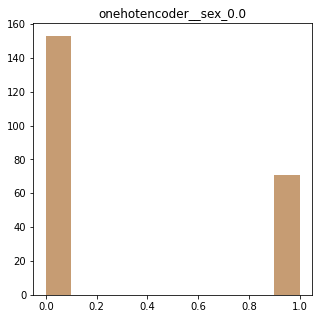

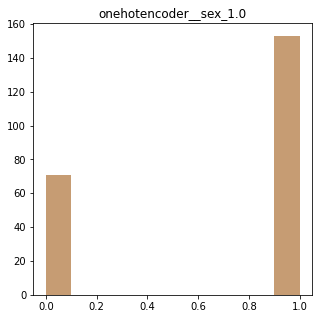

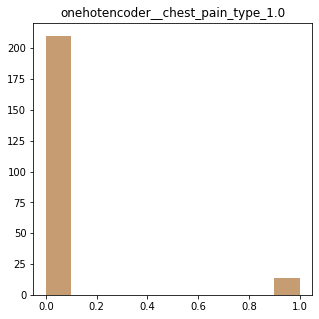

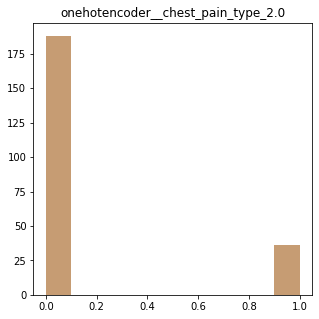

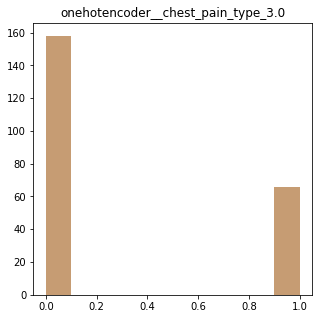

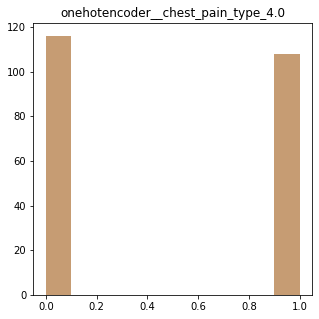

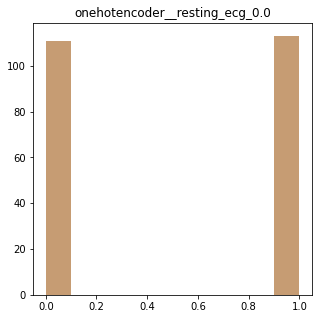

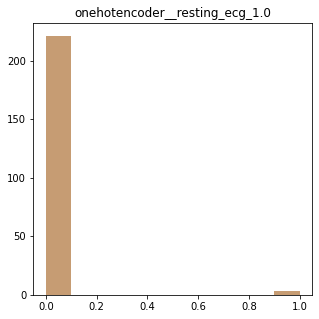

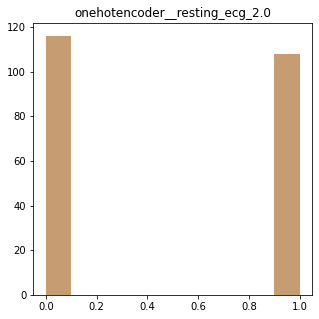

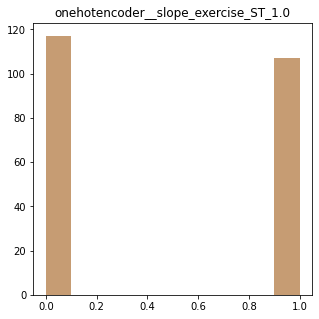

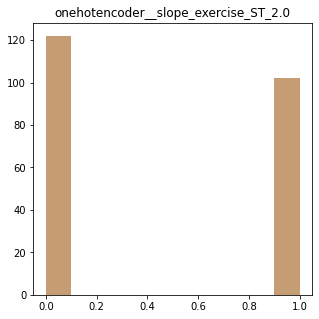

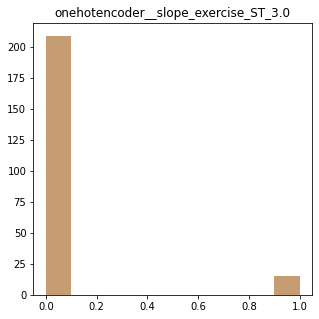

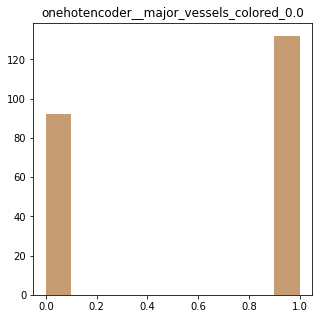

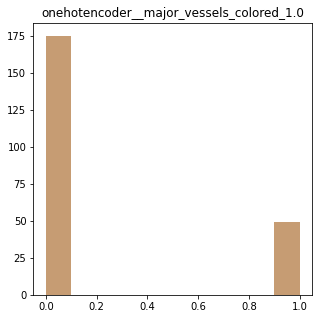

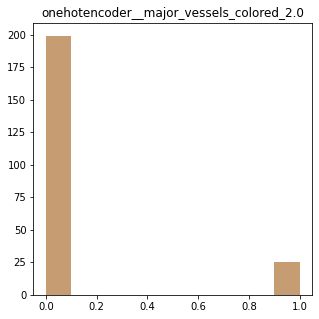

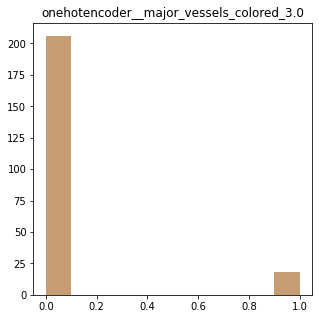

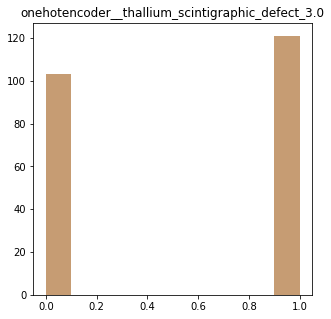

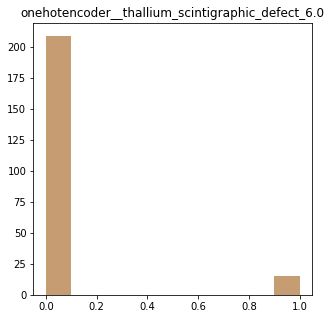

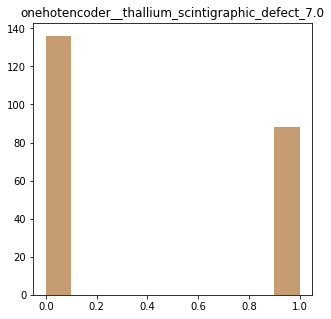

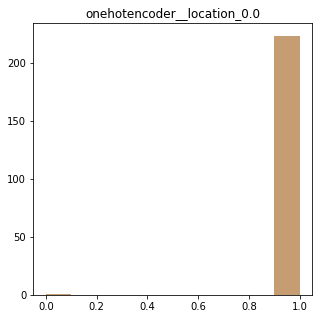

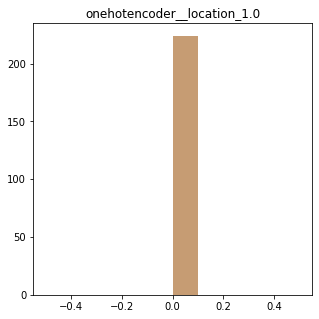

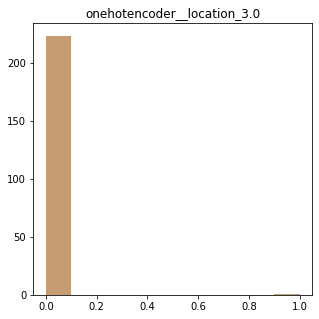

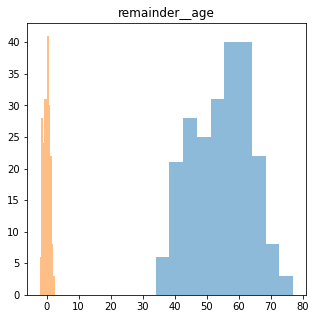

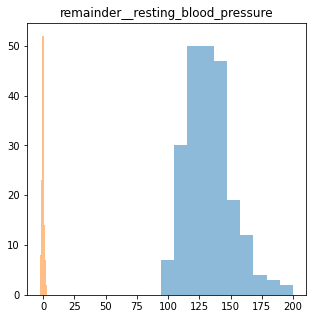

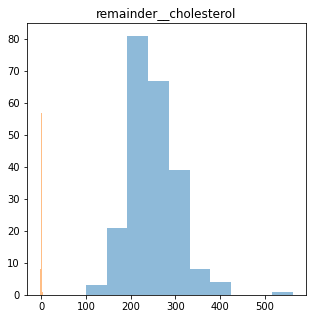

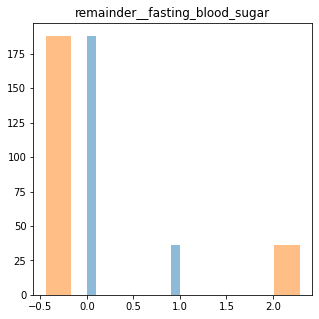

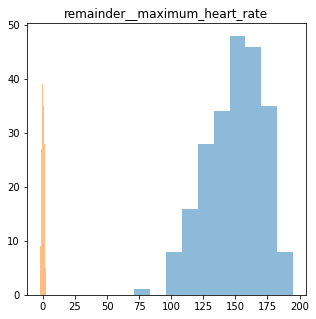

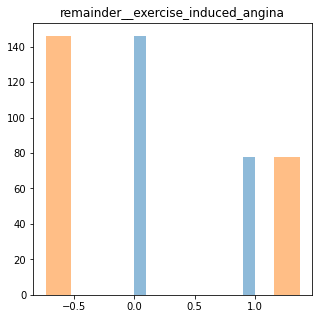

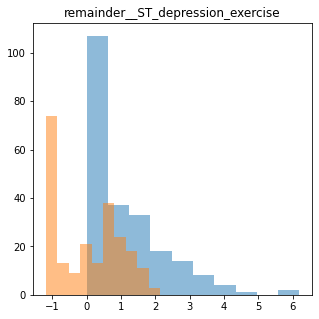

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
for idx, x in enumerate(column_headers):
  plt.figure()
  plt.title(x)
  plt.hist(X_train[:,idx], alpha=0.5)
  plt.hist(X_train_scaled[:,idx], alpha=0.5)

In [ ]:
tf=StandardScaler()
X_train_to_pt=X_train[:,[0,3,4,7,9]]
X_test_to_pt=X_test[:,[0,3,4,7,9]]
tf.fit(X_train_to_pt)
X_train_to_pt=tf.transform(X_train_to_pt)
X_test_to_pt=tf.transform(X_test_to_pt)


X_train_scaled[:,[0,3,4,7,9]]=X_train_to_pt
X_test_scaled[:,[0,3,4,7,9]]=X_test_to_pt
logreg = LogisticRegression( solver='liblinear').fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))



transformer.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression( solver='liblinear').fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

NameError: ignored

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_to_pt=X_train[:,[0,3,4,7,9]]
X_test_to_pt=X_test[:,[0,3,4,7,9]]
pt.fit(X_train_to_pt)
X_train_to_pt=pt.transform(X_train_to_pt)
X_test_to_pt=pt.transform(X_test_to_pt)
X_train_scaled[:,[0,3,4,7,9]]=X_train_to_pt
X_test_scaled[:,[0,3,4,7,9]]=X_test_to_pt
logreg = LogisticRegression( solver='liblinear').fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression( solver='liblinear').fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression( solver='liblinear').fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

In [ ]:
sns.pairplot(pd.DataFrame(X_train[:,[0,3,4,7,9]]))

In [ ]:
sns.pairplot(pd.DataFrame(X_train_to_pt))